In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\eserheads\anaconda3\envs\environment1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_location'] == "United States")&(df['job_title_short'] == "Data Analyst")]

df_DA_US.dropna(subset="salary_year_avg", inplace=True)

df_DA_US

C:\Users\eserheads\AppData\Local\Temp\ipykernel_28292\1768736318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_US.dropna(subset="salary_year_avg", inplace=True)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,"[sql, excel, ms access]","{'analyst_tools': ['excel', 'ms access'], 'pro..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.","[python, sql, numpy, pandas, zoom, slack]","{'libraries': ['numpy', 'pandas'], 'programmin..."
75652,Data Analyst,Data Analyst,United States,via LinkedIn,Full-time,False,"Illinois, United States",2023-10-11 00:04:40,False,False,United States,year,110000.0,NaN,Insight Global,"[python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
77561,Data Analyst,"Director, Data Analytics & Insights",United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-05-10 02:26:36,False,False,Sudan,year,190000.0,NaN,Believe,"[python, tableau, power bi, atlassian, jira]","{'analyst_tools': ['tableau', 'power bi'], 'as..."
112921,Data Analyst,Associate Director - Registrar Operations & Da...,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-12-01 00:59:58,False,True,Sudan,year,72000.0,NaN,Northeastern University,[tableau],{'analyst_tools': ['tableau']}
126171,Data Analyst,Analytics Engineer II,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-04-26 09:37:36,False,True,Sudan,year,147500.0,NaN,Gopuff,"[sql, snowflake, redshift, azure, looker, git]","{'analyst_tools': ['looker'], 'cloud': ['snowf..."
133159,Data Analyst,"Clinical Scientist, Neuroimaging",United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-07-24 08:36:08,False,True,Sudan,year,169833.5,NaN,Denali Therapeutics,[unity],{'other': ['unity']}
143111,Data Analyst,Product Management Data Analyst (Entry-Level),United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-23 08:04:08,True,True,United States,year,59500.0,NaN,American National,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
202464,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-17 22:08:09,False,True,United States,year,87500.0,NaN,Angi,"[sql, r, python, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
212642,Data Analyst,Data Science Analyst,United States,via Indeed,Full-time,False,"Texas, United States",2023-11-22 22:04:02,False,False,United States,year,112350.0,NaN,Greater New York Mutual Insurance Company,"[r, python, sql, vba, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."


In [3]:
df_US_exploded = df_DA_US.explode(column="job_skills")

df_US_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,sql,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,excel,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,ms access,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.",python,"{'libraries': ['numpy', 'pandas'], 'programmin..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.",sql,"{'libraries': ['numpy', 'pandas'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754319,Data Analyst,Finance Master Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-12-21 20:53:32,False,False,Sudan,year,89204.0,NaN,Nestlé,excel,{'analyst_tools': ['excel']}
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,python,"{'programming': ['python', 'r']}"
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,r,"{'programming': ['python', 'r']}"
771915,Data Analyst,Provider Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-11-17 01:40:02,False,False,Sudan,year,69900.0,NaN,Health Care Service Corporation,word,"{'analyst_tools': ['word', 'excel']}"


In [4]:
df_skills = df_US_exploded.groupby("job_skills")['salary_year_avg'].agg(['count', 'median']).sort_values(by="count",ascending=False)

In [5]:
df_skills.rename(columns={"count":"Skill Count", "median":"Median Salary"}, inplace=True)

In [6]:
skill_count = len(df_DA_US)

In [7]:
df_skills['%'] = df_skills['Skill Count']*100/skill_count

In [8]:
df_plot = df_skills.head(10)

df_plot

,Skill Count,Median Salary,%
job_skills,,,
sql,20,88500.00,52.631579
tableau,16,88500.00,42.105263
python,15,100000.00,39.473684
excel,14,82258.75,36.842105
power bi,10,106400.00,26.315789
word,8,75033.75,21.052632
r,8,88500.00,21.052632
sharepoint,5,77017.50,13.157895
sas,4,93525.00,10.526316


In [9]:
df_plot.iloc[0,1]

np.float64(88500.0)

In [10]:
acceptable = 5
df_skills = df_skills[df_skills['%'] >= acceptable]

df_skills

,Skill Count,Median Salary,%
job_skills,,,
sql,20,88500.00,52.631579
tableau,16,88500.00,42.105263
python,15,100000.00,39.473684
excel,14,82258.75,36.842105
power bi,10,106400.00,26.315789
word,8,75033.75,21.052632
r,8,88500.00,21.052632
sharepoint,5,77017.50,13.157895
sas,4,93525.00,10.526316


In [11]:
from matplotlib.ticker import FuncFormatter

C:\Users\eserheads\AppData\Local\Temp\ipykernel_28292\1753174265.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


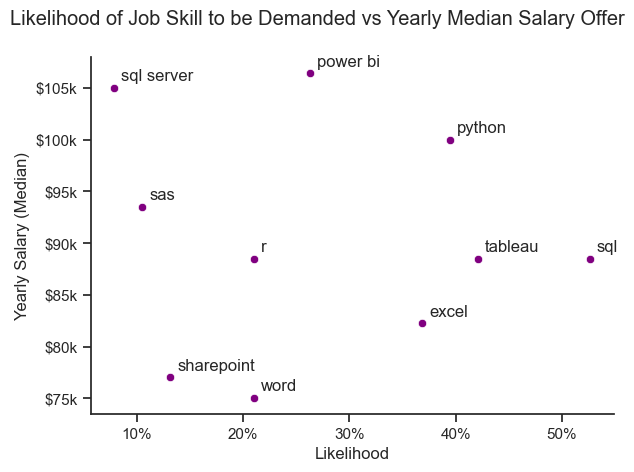

In [12]:
sns.set_theme(style="ticks")
sns.scatterplot(df_plot, x="%", y="Median Salary", color="purple")
sns.despine()

def formatter(x, pos):
    return f'${int(x/1000)}k'
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatter))

def formatter1(x, pos):
    return f'{int(x)}%'
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatter1))

for i in range(10):
    plt.annotate(df_plot.index[i], (df_plot.iloc[i,2], df_plot.iloc[i,1]),textcoords="offset points", xytext=(5, 5), ha='left')

plt.legend().remove()
plt.xlabel('Likelihood')
plt.ylabel('Yearly Salary (Median)')
plt.suptitle("Likelihood of Job Skill to be Demanded vs Yearly Median Salary Offer")
plt.tight_layout()
plt.show()